In [1]:
import mailbox, pandas as pd, numpy as np 
import matplotlib.pyplot as plt, matplotlib.font_manager as fm
from dateutil.parser import parse as parse_datetime
%matplotlib inline

In [2]:
# define the fonts to use for plots
family = 'Myriad Pro'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')
label_font = fm.FontProperties(family=family, style='normal', size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family=family, style='normal', size=12, weight='normal', stretch='normal')

In [3]:
# load the mbox file
path = r'H:/Data Sets/takeout-20170522T122917Z-001/Takeout/Mail/All mail Including Spam and Trash.mbox'
mbox = mailbox.mbox(path)
print('There are {:,} messages in the archive.'.format(len(mbox)))
for eachmail in mbox:
    print (eachmail['X-Gmail-Labels'])


There are 2,196 messages in the archive.
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Important,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Important,Inbox
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Spam
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Spam
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Important,Trash
Unread,Trash
Unread,Trash
Unread,Important,Trash
Unread,Important,Trash
Important,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Spam
Unread,Inbox
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Important,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Trash
Unread,Tr

In [4]:
# get a list of the dates/times of all the messages in the mbox
all_dates = []
all_times = []
for message in mbox:
    # it's an email and not a chat if there's no label, or if there's a label but it's not 'chat'
    if not 'X-Gmail-Labels' in message or ('X-Gmail-Labels' in message and not 'Chat' in message['X-Gmail-Labels']):
        if 'Date' in message and message['Date'] is not None:
            try:
                date, time = str(parse_datetime(message['Date'])).split(' ')
            except Exception as e:
                print(e, message['Date'])
            all_dates.append(date)
            all_times.append(time)
        else:
            # hangouts messages have no Date key, so skip them
            pass
print('There are {:,} messages with dates.'.format(len(all_dates)))

There are 1,963 messages with dates.


In [6]:
# get the count per date
date_counts = pd.Series(all_dates).value_counts().sort_index()
print('There are {:,} dates with messages.'.format(len(date_counts)))
date_counts.head()

There are 190 dates with messages.


2014-10-16    1
2016-09-05    1
2016-09-06    1
2016-09-07    1
2016-09-08    3
dtype: int64

In [7]:
date_counts

2014-10-16     1
2016-09-05     1
2016-09-06     1
2016-09-07     1
2016-09-08     3
2016-09-09     2
2016-09-10     1
2016-09-13     2
2016-09-14     1
2016-09-15     2
2016-09-16     1
2016-09-17     1
2016-09-19     1
2016-09-22     2
2016-09-23     3
2016-09-26     1
2016-09-27     3
2016-09-28     1
2016-09-29     1
2016-09-30     1
2016-10-01     4
2016-10-02     3
2016-10-03     1
2016-10-04     3
2016-10-05     1
2016-10-06     1
2016-10-08     4
2016-10-10     1
2016-10-11     1
2016-10-12     1
              ..
2017-04-23    14
2017-04-24    26
2017-04-25    24
2017-04-26    29
2017-04-27    23
2017-04-28    17
2017-04-29    15
2017-04-30    15
2017-05-01    10
2017-05-02    26
2017-05-03    16
2017-05-04    40
2017-05-05    20
2017-05-06    16
2017-05-07    15
2017-05-08    17
2017-05-09    31
2017-05-10    34
2017-05-11    38
2017-05-12    26
2017-05-13    32
2017-05-14    10
2017-05-15    40
2017-05-16    32
2017-05-17    38
2017-05-18    40
2017-05-19    43
2017-05-20    

In [15]:
# not every date necessarily has a message, so fill in missing dates in the range with zeros
date_range = pd.date_range(start=min(all_dates), end=max(all_dates), freq='D')
index = date_range.map(lambda x: str(x.date()))
date_counts = date_counts.reindex(index, fill_value=0)

print('There are {:,} dates total in the range, with or without messages.'.format(len(date_counts)))
date_counts.head()

There are 950 dates total in the range, with or without messages.


2014-10-16    1
2014-10-17    0
2014-10-18    0
2014-10-19    0
2014-10-20    0
dtype: int64

In [16]:
date_counts

2014-10-16     1
2014-10-17     0
2014-10-18     0
2014-10-19     0
2014-10-20     0
2014-10-21     0
2014-10-22     0
2014-10-23     0
2014-10-24     0
2014-10-25     0
2014-10-26     0
2014-10-27     0
2014-10-28     0
2014-10-29     0
2014-10-30     0
2014-10-31     0
2014-11-01     0
2014-11-02     0
2014-11-03     0
2014-11-04     0
2014-11-05     0
2014-11-06     0
2014-11-07     0
2014-11-08     0
2014-11-09     0
2014-11-10     0
2014-11-11     0
2014-11-12     0
2014-11-13     0
2014-11-14     0
              ..
2017-04-23    14
2017-04-24    26
2017-04-25    24
2017-04-26    29
2017-04-27    23
2017-04-28    17
2017-04-29    15
2017-04-30    15
2017-05-01    10
2017-05-02    26
2017-05-03    16
2017-05-04    40
2017-05-05    20
2017-05-06    16
2017-05-07    15
2017-05-08    17
2017-05-09    31
2017-05-10    34
2017-05-11    38
2017-05-12    26
2017-05-13    32
2017-05-14    10
2017-05-15    40
2017-05-16    32
2017-05-17    38
2017-05-18    40
2017-05-19    43
2017-05-20    

In [20]:
# create a series of labels for the plot: each new year's day
xlabels = pd.Series([label if '01-01' in label else None for label in date_counts.index])
xlabels = xlabels[pd.notnull(xlabels)]
xlabels.head()

77     2015-01-01
442    2016-01-01
808    2017-01-01
dtype: object

In [21]:
xlabels

77     2015-01-01
442    2016-01-01
808    2017-01-01
dtype: object

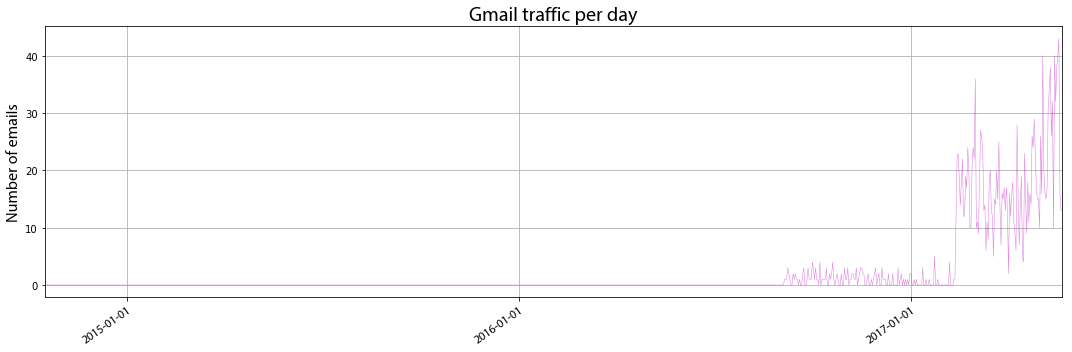

In [37]:
# plot the counts per day
fig = plt.figure(figsize=[15, 5])
ax = date_counts.plot(kind='line', linewidth=0.5, alpha=0.5, color='m')

ax.grid(True)
ax.set_xticks(xlabels.index)
ax.set_xticklabels(xlabels, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.set_ylabel('Number of emails', fontproperties=label_font)
ax.set_title('Gmail traffic per day', fontproperties=title_font)

fig.tight_layout()

plt.show()

In [23]:
# get the count per month
all_months = [x[:-3] for x in all_dates]
month_counts = pd.Series(all_months).value_counts().sort_index()
month_counts.head()

2014-10     1
2016-09    29
2016-10    43
2016-11    39
2016-12    24
dtype: int64

In [24]:
# not every month necessarily has a message, so fill in missing months in the range with zeros
date_range = pd.date_range(start=min(all_dates), end=max(all_dates), freq='D')
months_range = date_range.map(lambda x: str(x.date())[:-3])
index = np.unique(months_range)
month_counts = month_counts.reindex(index, fill_value=0)

In [27]:
index

array(['2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03',
       '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09',
       '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03',
       '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09',
       '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05'], dtype=object)

In [16]:
# create a series of labels for the plot: each january
xlabels = pd.Series([label if '-01' in label else None for label in month_counts.index])
xlabels = xlabels[pd.notnull(xlabels)]
xlabels.head()

3     2015-01
15    2016-01
27    2017-01
dtype: object

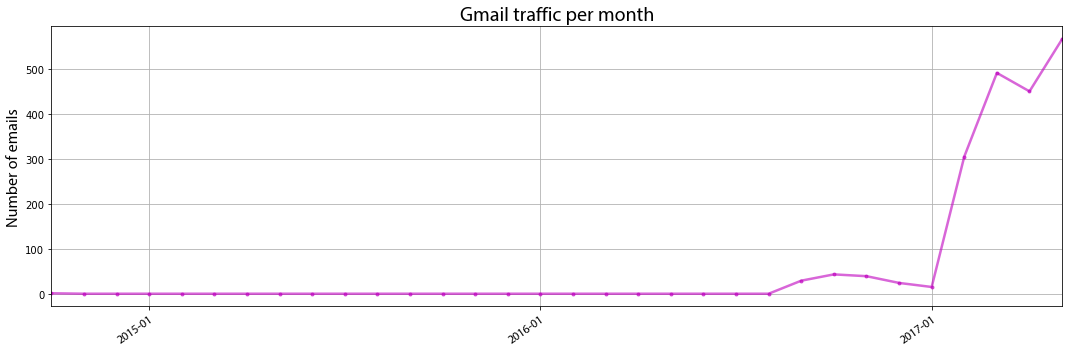

In [17]:
# plot the counts per month
fig = plt.figure(figsize=[15, 5])
ax = month_counts.plot(kind='line', linewidth=2.5, alpha=0.6, color='m', marker='.', markeredgecolor='m')

ax.grid(True)
ax.set_xticks(xlabels.index)
ax.set_xticklabels(xlabels, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.set_ylabel('Number of emails', fontproperties=label_font)
ax.set_title('Gmail traffic per month', fontproperties=title_font)

fig.tight_layout()

plt.show()

In [48]:
# get the count per day of the week
day_counts = pd.DataFrame()
day_counts['count'] = date_counts
day_counts['day_of_week'] = date_counts.index.map(lambda x: parse_datetime(x).weekday())
mean_day_counts = day_counts.groupby('day_of_week')['count'].mean()
xlabels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [49]:
mean_day_counts

day_of_week
0    2.352941
1    2.318519
2    2.244444
3    2.698529
4    2.117647
5    1.610294
6    1.125000
Name: count, dtype: float64

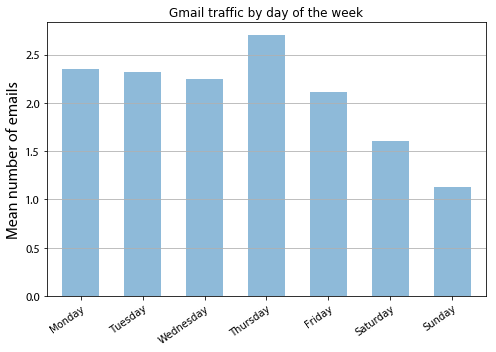

In [35]:
fig = plt.figure(figsize=[7, 5])
ax = mean_day_counts.plot(kind='bar', width=0.6, alpha=0.5, )

ax.yaxis.grid(True)
ax.set_xticklabels(xlabels, rotation=35, rotation_mode='anchor',  ha='right')


ax.set_title('Gmail traffic by day of the week')
ax.set_xlabel('')
ax.set_ylabel('Mean number of emails', fontproperties=label_font)

fig.tight_layout()

plt.show()

In [68]:
# get the count per hour of the day
times = pd.Series(all_times).map(lambda x: '{:02}:00'.format(parse_datetime(x).hour))
time_counts = times.value_counts().sort_index()
time_counts.head()

00:00    112
01:00     95
02:00     91
03:00    107
04:00    146
dtype: int64

In [64]:
times

0       23:00
1       09:00
2       05:00
3       02:00
4       07:00
5       01:00
6       07:00
7       18:00
8       10:00
9       23:00
10      05:00
11      03:00
12      04:00
13      22:00
14      06:00
15      02:00
16      20:00
17      06:00
18      04:00
19      22:00
20      14:00
21      09:00
22      04:00
23      07:00
24      10:00
25      02:00
26      07:00
27      03:00
28      20:00
29      06:00
        ...  
1933    11:00
1934    06:00
1935    23:00
1936    03:00
1937    08:00
1938    07:00
1939    21:00
1940    10:00
1941    18:00
1942    23:00
1943    00:00
1944    02:00
1945    12:00
1946    08:00
1947    06:00
1948    13:00
1949    09:00
1950    17:00
1951    08:00
1952    06:00
1953    10:00
1954    05:00
1955    13:00
1956    20:00
1957    01:00
1958    12:00
1959    03:00
1960    11:00
1961    07:00
1962    03:00
dtype: object

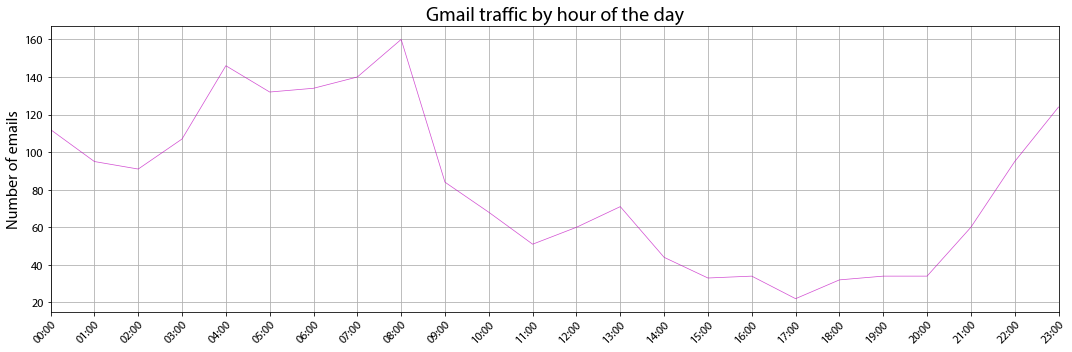

In [71]:
# create a series of labels for the plot: each new hour
xlabels = pd.Series([label if ':00' in label else None for label in time_counts.index])
xlabels = xlabels[pd.notnull(xlabels)]

fig = plt.figure(figsize=[15, 5])
ax = time_counts.plot(kind='line', linewidth=0.7, alpha=0.7, color='m')

ax.grid(True)
ax.set_xticks(xlabels.index)
ax.set_xticklabels(time_counts.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Gmail traffic by hour of the day', fontproperties=title_font)
ax.set_ylabel('Number of emails', fontproperties=label_font)

fig.tight_layout()

plt.show()


In [58]:
# get the count per minute of the day, as hh:mm
minutes = pd.Series(all_times).map(lambda x: '{:02}:{:02}'.format(parse_datetime(x).hour, parse_datetime(x).minute))
minute_counts = minutes.value_counts().sort_index()

In [59]:
minute_counts

00:00    1
00:02    3
00:04    1
00:05    1
00:06    2
00:07    3
00:08    3
00:10    1
00:11    2
00:12    1
00:13    2
00:14    2
00:15    1
00:17    3
00:19    1
00:20    3
00:21    3
00:22    1
00:23    4
00:24    1
00:25    2
00:26    1
00:27    2
00:28    1
00:29    1
00:30    1
00:31    1
00:32    4
00:33    2
00:34    3
        ..
23:29    2
23:30    2
23:31    1
23:32    3
23:33    2
23:34    2
23:35    6
23:36    1
23:37    1
23:38    5
23:39    4
23:40    2
23:41    1
23:42    5
23:43    3
23:44    2
23:45    1
23:46    3
23:47    3
23:49    2
23:50    3
23:51    4
23:52    4
23:53    2
23:54    2
23:55    2
23:56    1
23:57    3
23:58    2
23:59    2
dtype: int64

In [60]:
# not every minute necessarily has a message, so fill in missing times with zeros
time_range = pd.date_range(start='0:00', end='23:59', freq='1min')
index = time_range.map(lambda x: '{:02}:{:02}'.format(x.hour, x.minute))
minute_counts = minute_counts.reindex(index, fill_value=0)

In [61]:
# create a series of labels for the plot: each new hour
xlabels = pd.Series([label if ':00' in label else None for label in minute_counts.index])
xlabels = xlabels[pd.notnull(xlabels)]

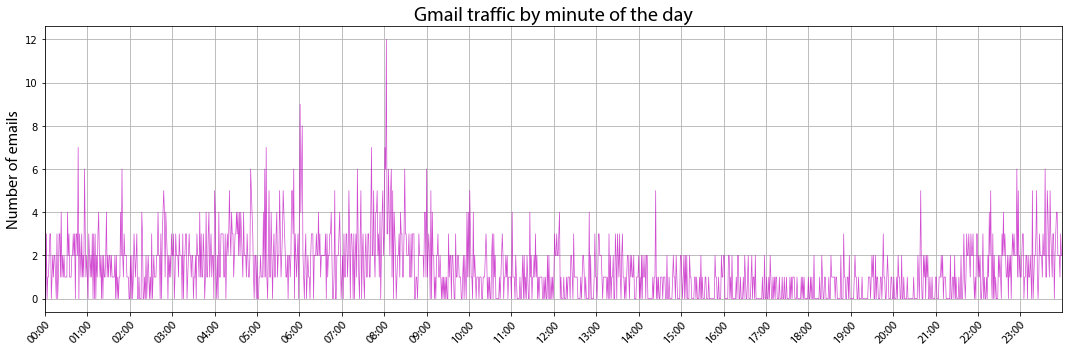

In [62]:
# plot the counts per minute
fig = plt.figure(figsize=[15, 5])
ax = minute_counts.plot(kind='line', linewidth=0.7, alpha=0.7, color='m')

ax.grid(True)
ax.set_xticks(xlabels.index)
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.set_ylabel('Number of emails', fontproperties=label_font)
ax.set_title('Gmail traffic by minute of the day', fontproperties=title_font)

fig.tight_layout()

plt.show()